<a href="https://colab.research.google.com/github/alberto1971/Curso-de-introduccion-a-Big-Data-Parte-3-nov2021/blob/main/Aprend_No_Superv_Preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: blue;'>APRENDIZAJE NO SUPERVISADO: PREPROCESADO</h1>

El aprendizaje no supervisado comprende una serie de algoritmos que se aplican a los datos para transformarlos o para encontrar patrones sin conocer ningún resultado preestablecido.

Las <u>__transformaciones__</u> crean una nueva representación de los datos que es más conveniente para su posterior tratamiento o visualización. Por ejemplo, podemos escalar o normalizar los datos o reducir su dimensionalidad. Estos algoritmos son útiles en la preparación de los datos para posteriores procesos de aprendizaje, típicamente supervisados.

La busqueda de patrones o <u>__clusterización__</u> nos permite descubrir la estructura y ordenación de los datos. Estos algoritmos son útiles en fases de análisis exploratorios de los datos.

En la guía de usuario de scikit-learn podemos encontrar todos los algoritmos y utilizades de las librerías: <a href='https://scikit-learn.org/stable/user_guide.html'>guía de usuario Skit-Learn</a>

Exploraremos en este primer módulo de aprendizaje no supervisado la parte de *utilidades de preprocesado de los datos*.

# 0. Cargamos las librerías necesarias

Cargamos todas las librerías de DataScience y configuramos matplot lib para que muestre las imagenes inline, ie. en la misma celda que la genera.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 1. Generamos datos

*SKLearn* tiene una serie de herramientas para hacer pruebas, como generadores de datos, conjuntos de datos de prueba, etc..

Utilizamos el generador <b>make_blobs</b> para crear conjuntos de datos n-dimensionales isotropicos (que se distribuyen igual en todas las direcciones). Los datos generados se agrupan en burbujas entorno a un centro dado y distribuidos en forma normal con una desviación estandard dada.

<b>make_blobs</b> permite controlar la posicion del centro y de la desviacion estandar y es util para nuestros ejercicios de transformación y preproceso.

<a href='http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs'>Ver parametros de make_blobs</a>

<a href='http://scikit-learn.org/stable/datasets/index.html'>La lista de utilidades de datos de SKLearn</a>

Creamos un conjunto de datos bidimensionales, esto es, los datos van a tener 2 variables explicativas de negocio.

(50, 2)


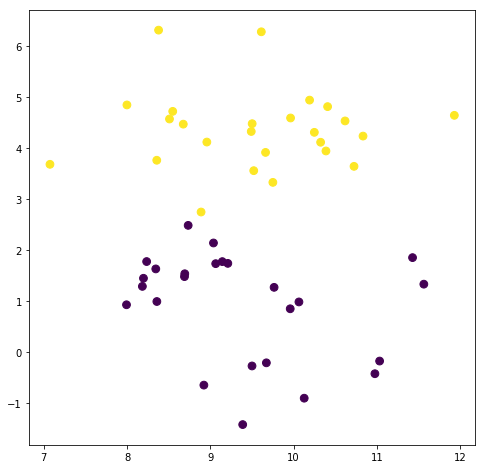

In [ ]:
from sklearn.datasets import make_blobs

# crea 50 muestras en 2 clusteres con desviación estandar 1 y random state=4
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=4, cluster_std=1)
# imprimimos los datos

print(X.shape)
#print(X)
#print(y)

# hacemos una grafica de dispersion
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(X[:, 0], X[:, 1], c=y, s=60)

#Ejercicio -> prueba diferentes opciones de make blobs
# Solucion -> (centers = [(-5, -5), (0, 0), (5, 5)],cluster_std=1.0, shuffle=False, random_state=42)

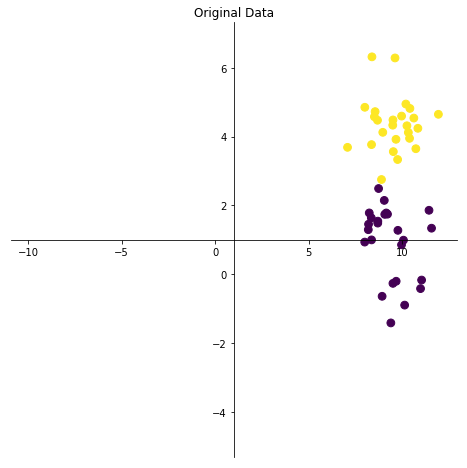

In [ ]:
# La figura con los ejes centrados en (0,0)

fig = plt.figure(figsize=(8, 8))
main_ax = fig.add_subplot(1, 1, 1)

main_ax.scatter(X[:, 0], X[:, 1], c=y, s=60)
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")

main_ax.spines['left'].set_position('center')
main_ax.spines['right'].set_color('none')
main_ax.spines['bottom'].set_position('center')
main_ax.spines['top'].set_color('none')

# 2. Preprocesado y escalado

Muchos de los algoritmos utilizados en Machine Learning son sensibles al escalado de los datos de entrada. En scikit-learn existen una serie de algoritmos que nos permiten aplicar transformaciones a los datos de entrada para escalarlos según sea necesario.

El paquete *sklearn.preprocessing* es el que contiene todas las utilidades de transformación de los datos. Vamos a ver como se utiliza. 

## 2.1 Estimadores: modelos o algoritmos

Todos los algoritmos de *scikit-learn*, sean de procesamiento de datos, de aprendizaje supervisado o no supervisado estan implementados con clases denominada __*'Estimators'*__. Nosotros utilizaremos también las palabras modelos o algoritmos para hablar de estos estimadores.

<div class="alert alert-block alert-info">Resumen de los métodos de los estimadores:

<table style="width:80%;border: 1px solid black;">
  <tr style="border: 1px solid black;"><td style="text-align:left">estimator.fit(X_train, [y_train])</td><td style="text-align:left"></td></tr>
  <tr><td style="border: 1px solid black;text-align:left">estimator.predict(X_test)</td><td style="border: 1px solid black;text-align:left">estimator.transform(X_test)</td></tr>
  <tr><td style="border: 1px solid black;text-align:left">Classification</td><td style="border: 1px solid black;text-align:left">Preproccessing</td></tr>
  <tr><td style="border: 1px solid black;text-align:left">Regression</td><td style="border: 1px solid black;text-align:left">Dimensionality Reduction</td></tr>
  <tr><td style="border: 1px solid black;text-align:left">Clustering</td><td style="border: 1px solid black;text-align:left">Feature Extraction</td></tr>
  <tr><td style="border: 1px solid black;text-align:left"></td><td style="border: 1px solid black;text-align:left">Feature Selecction</td></tr>
</table>

</div>

La clase estimador contiene el algoritmo digamos 'en blanco', con unos parámetros todavía no definidos. Cuando le aplicamos al estimador nestros datos, aprende los parámetros del algoritmo. 

Los estimadores tienen el metodo de entrenamiento *.fit* para aplicar un modelo a nuestros datos. El metodo *.fit* toma como argumentos los datos de entrada y genera el modelo. Una vez generado el modelo, el estimador ya tiene los parametros del algoritmo ajustados y nos sirve para hacer nuevas transformaciones o predicciones sobre nuevos datos. Los métodos que se utilizan para ello son *.predict* y *.transform*.

Además tiene una serie de parámetros que explican el modelo generado y nos sirven para entender su comportamiento y la importancia de las distintas variables.

Los datos de entrada y salida suelen ir informados como un _*ndarrays*_ de *numPy* (floating-points), *Series* o *Dataframes* de _*pandas*_.


## 2.2 Tipos de operaciones

El conjunto de estimadores de transformación de datos puede verse en la página de <a href='https://scikit-learn.org/stable/modules/preprocessing.html'>algoritmos de preprocesado</a>

### 2.2.1 Standard scaler

Probamos el *StandardScaler* que escala los datos para tener varianza 1 y desplaza los datos para que la media sea 0.

Produce un escalado que se comporta bien si no hay datos muy extremos (denominados *outliers* en inglés). Si los datos no tienen valores extremos la tranformación guarda la relacion de escalado entre los valores. Si hay valores extremos, estos pocos valores marcan el escalado y generalmente comprimen demasiado el resto de los valores. 

Veamos como utilizar este estimador <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler'>*StandardScaler*</a>

El escalado va a analizar cada una de las variables explicativas y obtener la media, la desviación estandar y escalará cada variable realizando la operación:

$$x^{(i)}_{out} = \frac{x_{in}^{(i)}-\mu^{(i)}}{\sigma^{(i)}}$$

siendo $\mu^{(i)}$ la media de la variable $x_{in}^{(i)}$ y $\sigma^{(i)}$ su desviación

Text(0.5,1,'StandardScaler')

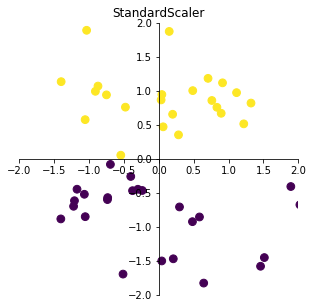

In [ ]:
# importamos el estimador necesario del paquete preprocessing
from sklearn.preprocessing import StandardScaler

# creamos un estimador
myscaler=StandardScaler()

# lo ajustamos con el metodo .fit a nuestros datos
myscaler.fit(X)

# transformamos los datos con este estimador
X_ = myscaler.transform(X)

# opcional: se puede ajustar y transformar los datos a la vez
# usando .fit_transform
#X_ = mysacler.fit_transform(X)

# dibujamos una figura con los datos escalados
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.scatter(X_[:, 0], X_[:, 1], c=y,  s=60)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title(type(myscaler).__name__)

Podemos ver los parámetros del estimador, los valores de ajuste que ha obtenido el algoritmo a partir de nuestros datos:

In [ ]:
# imprimir el escalado, la variación y la media
print('escalado: ',myscaler.scale_)
print('variacion: ',myscaler.var_)
print('media: ',myscaler.mean_)

escalado:  [1.04178634 1.93941235]
variacion:  [1.08531877 3.76132026]
media:  [9.45689034 2.64805098]


Comprobamos que los parámetros del estimador son exactamente los valores estadísticos de la media y variación para la primera variable $X[:,0]$

In [ ]:
# imprimir la variación y la media de la primera variable
print('var X[:,0]: ', np.var(X[:, 0]))
print('media X[:,0]: ', np.mean(X[:, 0]))

var X[:,0]:  1.085318772298226
media X[:,0]:  9.456890341859996


### 2.2.2 MinMaxScaler y MaxAbsScaler

Estos dos estimadores re-escalan los datos a un intervalo dado. 

*MinMaxScaler* re-escala los datos de cada variable en el rango [0, 1] o en otro rango que se pase al estimador.  La descripción de este estimador puedes verla en <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler'>MinMaxScaler</a>

*MaxAbsScaler* es como el anterior pero escala los datos en el intervalo [-1, 1]. Si los datos de entreda son positivos se comporta exactemente como el *MinMaxScaler*. La descripción de este estimador puedes verla en <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler'>MaxAbsScaler</a>

Como puede pensarse *StandardScaler*, *MinMaxScaler* y *MaxAbsScaler* son muy sensibles a pa presencia de valores extremos o '*outliers*'.

### 2.2.3 RobustScaler

*RobustScaler* viene a escalar los datos de una forma similar al *StandardScaler* pero evitando los efectos que pueden producir los valores extremos.

Para ello desplaza los datos a la mediana, en lugar de la media y ajusta la escala a la distancia intercuartiles (IQR: Interquartile Range). El IQR es el rango entre el primer (cuantil del $25$%) y eol tercer cuartil (cuantil del $75$%).

La descripción de este estimador puedes verla en <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler'>RobustScaler</a>


### 2.2.4 Normalizer

El *Normalizer* re-escala cada muestra a un vector de longitud la unidad. Proyecta cada muestra de datos en una hyper-esfera de radio unidad.

En este caso las variables no se operan de manera independiente, si no que es toda la muestra la que se re-escala. Lo que significa que cada muestra se re-escala con un valor diferente (la inversa de su longitud).

Esta normalización se usa cuando se trabaja con direcciones o ángulos, en lugar de posiciones en el hyper-spacio de datos. Esto es, lo importante de los datos no es su posición si no la direccion en la que apunta.

La descripción de este estimador puedes verla en <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer'>Normalizer</a>


Hacemos la transformación de los datos iniciales utilizando cuatro transformaciones: *StandardScaler*, *RobustScaler*, *MinMaxScaler* y *Normalizer*.

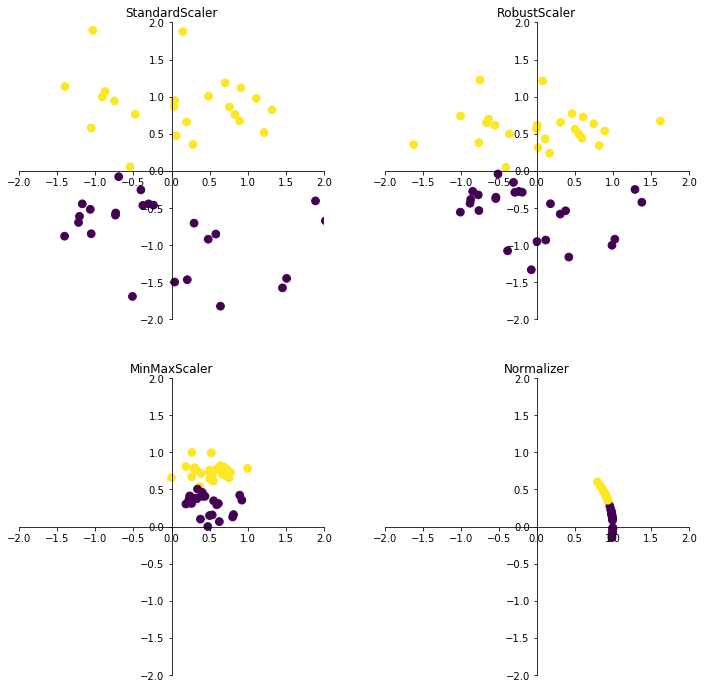

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

# construimos una lista con los cuatro estimadores
scalers = [StandardScaler(), RobustScaler(),
           MinMaxScaler(), Normalizer(norm='l2')]

# creamos la figura
fig = plt.figure(figsize=(12, 12))

# en un bucle, creamos 4 subplots
# uno para cada transformación
for i in range(0,len(scalers)):
    #transformamos los datos con un escalador de la lista
    scaler=scalers[i]
    X_ = scaler.fit_transform(X)
    
    # creamos una figura de gráfico de dispersion
    ax = fig.add_subplot(2, 2, i+1)

    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.scatter(X_[:, 0], X_[:, 1], c=y,  s=60)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

Para más info, puede consultarse el ejemplo de <a href='https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py'>comparación de transformacion de los diferentes algoritmos de preproceso de datos</a>

## 2.3 Como aplicar las transformaciones

En las transformaciones transladamos y re-escalamos los datos. La transformación es una operacion que genera una nueva representación de los datos. Veremos que esto es interesante pues ayuda a que determinados algoritmos funcionen mejor.

Como hemos visto si construimos un transformador en base a un conjunto de datos, este tiene unas características ajustadas para este conjunto de datos. Esto es un aspecto importante a tener en cuenta, porque cuando trabajemos con un conjunto de datos y lo dividamos en subconjuntos (entrenamiento, validación y test), siempre hemos de tener muy claro cual es la transformación que queremos aplicar a cada subconjunto.

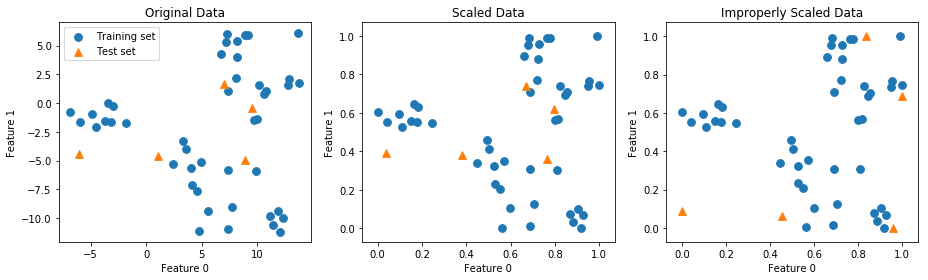

In [ ]:
# Creamos nuevos datos
# 50 muestras con 5 centros desviacion estandar 2 y random_state=4
X, y = make_blobs(n_samples=50, centers=5,
                  random_state=4, cluster_std=2)

# Dividimos el conjunto de datos en entrenamiento y test
# toma las 45 primeras muestras para entrenamiento y las 5 ultimas para test
X_train=X[:45,:]
X_test=X[45:,:]

# escalamos todos los datos con 
# el MinMaxScaler sobre los datos de entrenamiento
# construye es transformador, entrenalo y transforma los datos
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# escalamos todos los datos de test con 
# el MinMaxScaler sobre los datos de test
# NUNCA HACER ESTO!!! Aqui veremos la diferencia
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Figuras##############################################
# Los datos de entrenamiento y de test
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1],
                label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^'
                , label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Datos Originales")


# los datos escalados con la escala de entrenamiento
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                label="Test set", s=60)
axes[1].set_title("Datos Escalados")

# los datos de test escalados de forma incorrecta
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', label="test set", s=60)
axes[2].set_title("Datos mal Escalados")

for ax in axes:
    ax.set_xlabel("Variable 0")
    ax.set_ylabel("Variable 1")
fig.tight_layout()